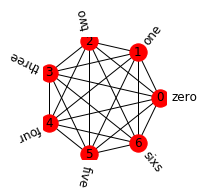

In [3]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

n = 7
G = nx.complete_graph(n)
node_list = sorted(G.nodes())
angle = []
angle_dict = {}
for i, node in zip(range(n),node_list):
    theta = 2.0*np.pi*i/n
    angle.append((np.cos(theta),np.sin(theta)))
    angle_dict[node] = theta
pos = {}
for node_i, node in enumerate(node_list):
    pos[node] = angle[node_i]

labels = {0:'zero',1:'one',2:'two',3:'three',4:'four',5:'five',6:'sixs'}

# figsize is intentionally set small to condense the graph
fig, ax = plt.subplots(figsize=(5,5))
margin=0.33
fig.subplots_adjust(margin, margin, 1.-margin, 1.-margin)
ax.axis('equal')

nx.draw(G,pos=pos,with_labels=True, ax=ax)
description = nx.draw_networkx_labels(G,pos,labels=labels)

r = fig.canvas.get_renderer()
trans = plt.gca().transData.inverted()
for node, t in description.items():
    bb = t.get_window_extent(renderer=r)
    bbdata = bb.transformed(trans)
    radius = 1.2+bbdata.width/2.
    position = (radius*np.cos(angle_dict[node]),radius* np.sin(angle_dict[node]))
    t.set_position(position)
    t.set_rotation(angle_dict[node]*360.0/(2.0*np.pi))
    t.set_clip_on(False)

plt.show()